<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [78]:
# import packages needed
import cobra
from cobra.sampling import sample
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from jupyterthemes import jtplot
jtplot.style(theme='grade3', grid=False)

In [79]:
#load differential flux data (binary)
df_logFC_up_down = pd.read_excel('shared_subs_up_down.xlsx', index_col=0)

In [80]:
df_logFC_up_down.index.name= 'Subsystems'
df_logFC_up_down.up_down =df_logFC_up_down.up_down.replace('up', 'Increased Flux')
df_logFC_up_down.up_down =df_logFC_up_down.up_down.replace('down', 'Decreased Flux')
df_logFC_up_down.columns = ['CO2', 'HCO3', 'N02 + NO3',
       'NO2', 'PO4', 'Si', 'up_down']

In [84]:
color_index = df_logFC_up_down.up_down.to_frame().reset_index(drop=True).up_down
df_logFC_up_down_mtrx = df_logFC_up_down.drop(labels="up_down", axis=1)
lut_row = {'Increased Flux': '#018571',
 'Decreased Flux': '#d95f02'}
row_colors = color_index.map(lut_row)
row_colors.index = df_logFC_up_down_mtrx.index
row_colors.name =None

[None, None, None, None, None, None, None, None, None, None, None, None]

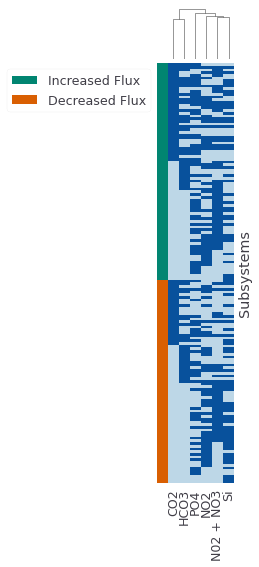

In [86]:
#plot
g = sns.clustermap(df_logFC_up_down_mtrx, row_colors=row_colors, row_cluster=False, 
                col_cluster=True, 
               linewidths=0.0, 
               cmap=['#bdd7e7', '#08519c'], 
                   figsize=(12,8),cbar_pos=None
                  )

for label in df_logFC_up_down.up_down.unique():
         g.ax_row_dendrogram.bar(0, 0, color=lut_row[label],
                            label=label, linewidth=0)
g.ax_row_dendrogram.legend(loc="upper right", ncol=1)
#.cax.set_position([.97, .2, .03, .45])

hm = g.ax_heatmap.get_position()
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), fontsize=6)
g.ax_heatmap.set_position([hm.x0, hm.y0, hm.width*0.25, hm.height])
col = g.ax_col_dendrogram.get_position()
g.ax_col_dendrogram.set_position([col.x0, col.y0, col.width*0.25, col.height*0.5])
g.ax_heatmap.tick_params(axis = 'y', label2On=False)
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=90)
#plt.savefig('shared_subs_up_down.svg')